In [1]:
pip install fastai --upgrade 

     |████████████████████████████████| 189 kB 7.5 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastai.vision.all import *

In [3]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=628de602f3489706c2679a1bd9df628c4c874181e11fdde699bfd2c168343a95
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil
Gen RAM Free: 26.0 GB  |     Proc size: 1.2 GB
GPU RAM Free: 16278MB | Used: 2MB | Util   0% | Total     16280MB


In [3]:
!pip install kaggle
from google.colab import files
files.upload()

{}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
## !kaggle datasets download -d abdallahalidev/plantvillage-dataset
!kaggle datasets download -d ankursingh12/resized-plant2021

 99% 1.41G/1.42G [00:06<00:00, 247MB/s]
100% 1.42G/1.42G [00:06<00:00, 226MB/s]


In [5]:
! unzip /content/gdrive/MyDrive/Second_Dataset.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: Datasets/Scab/92e17e8ae8ade198.jpg  
  inflating: Datasets/Scab/92e2b7924a79564b.jpg  
  inflating: Datasets/Scab/92ea6b11555ab50f.jpg  
  inflating: Datasets/Scab/92f64ac3df20a764.jpg  
  inflating: Datasets/Scab/92fe4ba504ffd00a.jpg  
  inflating: Datasets/Scab/932760c6955bb26b.jpg  
  inflating: Datasets/Scab/933951f9db800ab7.jpg  
  inflating: Datasets/Scab/9354019c9a33eeb7.jpg  
  inflating: Datasets/Scab/935b9982bcc57cb0.jpg  
  inflating: Datasets/Scab/937fbd80d80b093d.jpg  
  inflating: Datasets/Scab/9392d0fcd8c1c0fd.jpg  
  inflating: Datasets/Scab/939a9352466bca5e.jpg  
  inflating: Datasets/Scab/93a18d585eab45c7.jpg  
  inflating: Datasets/Scab/93bb3f6ea68d0241.jpg  
  inflating: Datasets/Scab/93d3c78e47933321.jpg  
  inflating: Datasets/Scab/93d6ca487a35e784.jpg  
  inflating: Datasets/Scab/93db930ab87564a5.jpg  
  inflating: Datasets/Scab/93e59b85a78a16aa.jpg  
  inflating: Datasets/Scab/93f212d69fd74888.jpg  
  inflating: D

In [6]:
path = '/content/Datasets'

In [7]:
fns=get_image_files(path)
fns

(#18632) [Path('/content/Datasets/Rust/b897c367857a9330.jpg'),Path('/content/Datasets/Rust/e58655bd36640c5b.jpg'),Path('/content/Datasets/Rust/b889d5b403de8fb0.jpg'),Path('/content/Datasets/Rust/b6c8eb69e91b1862.jpg'),Path('/content/Datasets/Rust/f8b8bf45709b091c.jpg'),Path('/content/Datasets/Rust/a895956a4ab43ece.jpg'),Path('/content/Datasets/Rust/b8f08391de9f9099.jpg'),Path('/content/Datasets/Rust/f95c31e8bde0dc20.jpg'),Path('/content/Datasets/Rust/da45e0fa5bccbd00.jpg'),Path('/content/Datasets/Rust/a263f418785f09f6.jpg')...]

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,image,labels
0,800113bb65efe69e.jpg,healthy
1,8002cb321f8bfcdf.jpg,scab frog_eye_leaf_spot complex
2,80070f7fb5e2ccaa.jpg,scab
3,80077517781fb94f.jpg,scab
4,800cbf0ff87721f8.jpg,complex


In [ ]:
df_list = df.values.tolist()

In [ ]:
print(df_list)

[['800113bb65efe69e.jpg', 'healthy'], ['8002cb321f8bfcdf.jpg', 'scab frog_eye_leaf_spot complex'], ['80070f7fb5e2ccaa.jpg', 'scab'], ['80077517781fb94f.jpg', 'scab'], ['800cbf0ff87721f8.jpg', 'complex'], ['800edef467d27c15.jpg', 'healthy'], ['800f85dc5f407aef.jpg', 'rust'], ['801d6dcd96e48ebc.jpg', 'healthy'], ['801f78399a44e7af.jpg', 'complex'], ['8021b94d437eb7d3.jpg', 'healthy'], ['802291cee9fec9f4.jpg', 'complex'], ['80230a9a3f7a9f6b.jpg', 'scab'], ['8023c3f31f875b6c.jpg', 'healthy'], ['80261f473eafb92c.jpg', 'scab'], ['80273091d9e9bddb.jpg', 'frog_eye_leaf_spot'], ['802962dc3ecdbb8d.jpg', 'scab'], ['802969daaddbbc8c.jpg', 'scab'], ['802b34badefa2ed0.jpg', 'scab'], ['802b59956a7aa5e7.jpg', 'healthy'], ['802f4bbd295063fe.jpg', 'scab'], ['802f7439ec1ef0cd.jpg', 'powdery_mildew'], ['8030a3a79fca6abb.jpg', 'rust'], ['803270d4d78faeba.jpg', 'scab'], ['8032d2eafa45f1ec.jpg', 'scab'], ['80331e0efb74dd62.jpg', 'healthy'], ['803553d5df59cac2.jpg', 'scab'], ['803b586d7db3ca16.jpg', 'rust'], 

In [ ]:
r, c = df.shape
print(r)

18632


In [ ]:
def get_x(x): return str(path) + os.path.sep + x['image']
def get_y(y): return y['labels']

In [8]:
leaf=DataBlock(blocks=(ImageBlock,CategoryBlock),
               get_items=get_image_files,
               splitter=RandomSplitter(valid_pct=(0.2),seed=42),
               get_y=parent_label,item_tfms=Resize(512))

In [9]:
leaf = leaf.new(item_tfms=Resize(512), batch_tfms=aug_transforms(mult=1.0, do_flip=True, flip_vert=False, max_rotate=40.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, size=None, mode='bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0))

In [10]:
dls=leaf.dataloaders(path,num_workers = 0)
#dls.train.show_batch(max_n=12, nrows = 2, unique = True)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [11]:
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 24.6 GB  |     Proc size: 3.8 GB
GPU RAM Free: 15277MB | Used: 1003MB | Util   6% | Total     16280MB


In [12]:
f1score = F1Score(average='macro')
learn = cnn_learner(dls, resnet50, metrics=[accuracy, f1score]).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [11]:
lr_min,lr_steep = learner.lr_find(suggest_funcs=(minimum,steep))

RuntimeError: ignored

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.20e-02, steepest point: 1.10e-02


In [ ]:
lr_steep

0.010964781977236271

In [ ]:
lr_min

0.012022644281387329

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.999493,0.631568,0.812668,0.448999,08:13


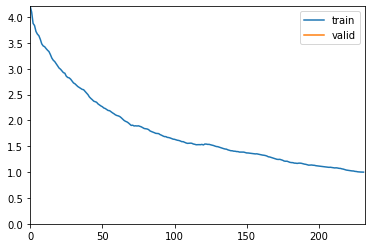

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.529897,0.392727,0.882716,0.507666,09:44
1,0.485779,0.386884,0.875738,0.508534,09:43
2,0.444918,0.368736,0.880569,0.504658,09:42
3,0.384465,0.358104,0.878690,0.565849,09:42
4,0.340780,0.310541,0.895867,0.588201,09:43
5,0.325240,0.293856,0.899893,0.563069,09:43
6,0.258852,0.284179,0.906334,0.607510,09:43
7,0.218110,0.258743,0.913580,0.671513,09:44
8,0.190992,0.255212,0.914117,0.656883,09:43


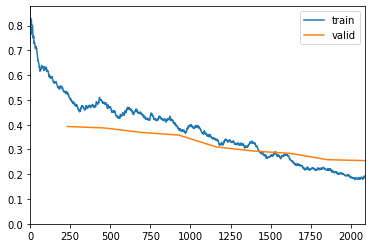

In [13]:
learn.fine_tune(9, 3e-3, wd=0.5,cbs=[ShowGraphCallback()])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.346637,0.194460,0.947988,0.052012,06:57


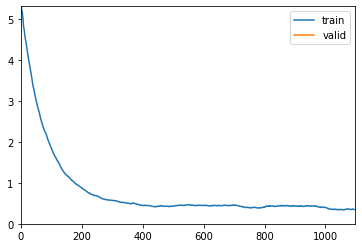

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.152187,0.093240,0.969669,0.030331,07:32
1,0.148058,0.180734,0.944802,0.055198,07:31
2,0.082855,0.077724,0.978774,0.021226,07:30
3,0.058179,0.045916,0.985831,0.014169,07:30
4,0.034827,0.030513,0.990042,0.009958,07:30
5,0.017535,0.010430,0.996415,0.003585,07:31
6,0.009422,0.004682,0.998634,0.001366,07:31
7,0.008094,0.004889,0.998350,0.001650,07:31


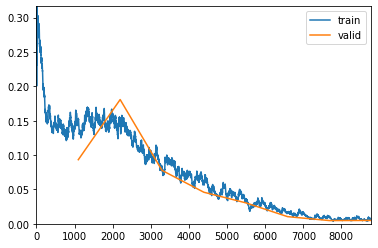

In [ ]:
#learner.fine_tune(8,base_lr=lr_steep,cbs=[ShowGraphCallback()])

In [14]:
from google.colab import files
learn.export('plantrowth_second_resnet50_train.pkl')
files.download('plantrowth_second_resnet50_train.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.upload()

Saving aaaaa.jpg to aaaaa.jpg


{'aaaaa.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x01\xbd\x01\xde\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\

In [ ]:
from PIL import Image
import os

img = Image.open('/content/aaaaa.jpg')

#os.remove('test.jpg')
img_resize = img.resize((512, 512))
img_resize.save('test.jpg')

In [ ]:
learn_test = load_learner('/content/no_2_dataset_train.pkl')
learn_test.predict("/content/test.jpg")

('powdery_mildew',
 tensor(4),
 tensor([1.0918e-01, 9.3482e-05, 1.2786e-03, 2.0634e-04, 6.8088e-01, 8.2936e-02,
         5.1326e-02, 3.7266e-03, 5.1190e-04, 5.3152e-02, 1.2595e-02, 4.1146e-03]))